[[ 0.52674372  0.97625882 -3.89812262 -0.01309077 -2.55225239 -2.77703012]
 [-0.74261091 -1.7611022  -2.40506336 -0.32696585  2.58668407  0.63726967]
 [-3.97373114  3.3528249  -1.24473634 -3.77971562 -2.57669426  2.87101994]
 [ 2.75472754 -0.10232975 -1.02574218 -2.53908322  1.23943652  1.39158359]
 [ 1.25180673 -0.12107418 -1.86205464 -0.3375296  -0.09881832 -0.66371554]
 [-3.54906671  3.65109575  2.55241947  0.0928776  -3.70403979  1.72850407]
 [ 2.36616199  3.93020791  3.65412328  0.38532202 -3.67507555 -0.50485754]
 [ 3.72063525 -3.02549513 -2.38697799 -3.57956065  1.57966162 -3.33192376]]
Generation :  0
Fitness
[ 27.57239205 -40.94948246 -31.00588649 -25.23618869   1.25100057
  20.51986633  59.1189352   -7.03493101]
Best result :  59.11893520144903
Parents
[[ 2.36616199  3.93020791  3.65412328  0.38532202 -3.67507555 -0.50485754]
 [ 0.52674372  0.97625882 -3.89812262 -0.01309077 -2.55225239 -2.77703012]
 [-3.54906671  3.65109575  2.55241947  0.0928776  -3.70403979  1.72850407]
 [

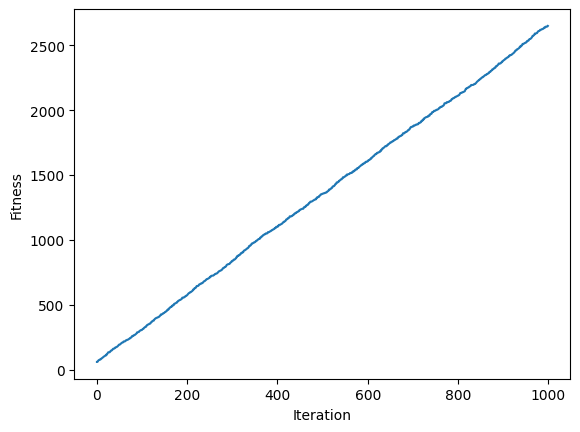

In [16]:
import numpy
import ga

"""
The y=target is to maximize this equation ASAP:
    y = w1x1+w2x2+w3x3+w4x4+w5x5+6wx6
    where (x1,x2,x3,x4,x5,x6)=(4,-2,3.5,5,-11,-4.7)
    What are the best values for the 6 weights w1 to w6?
    We are going to use the genetic algorithm for the best possible values after a number of generations.
"""

# Inputs of the equation.
equation_inputs = [4,-2,3.5,5,-11,-4.7]

# Number of the weights we are looking to optimize.
num_weights = len(equation_inputs)

"""
Genetic algorithm parameters:
    Mating pool size
    Population size
"""
sol_per_pop = 8
num_parents_mating = 4

# Defining the population size.
pop_size = (sol_per_pop,num_weights) # The population will have sol_per_pop chromosome where each chromosome has num_weights genes.
#Creating the initial population.
new_population = numpy.random.uniform(low=-4.0, high=4.0, size=pop_size)
print(new_population)

"""
new_population[0, :] = [2.4,  0.7, 8, -2,   5,   1.1]
new_population[1, :] = [-0.4, 2.7, 5, -1,   7,   0.1]
new_population[2, :] = [-1,   2,   2, -3,   2,   0.9]
new_population[3, :] = [4,    7,   12, 6.1, 1.4, -4]
new_population[4, :] = [3.1,  4,   0,  2.4, 4.8,  0]
new_population[5, :] = [-2,   3,   -7, 6,   3,    3]
"""

best_outputs = []
num_generations = 1000
for generation in range(num_generations):
    print("Generation : ", generation)
    # Measuring the fitness of each chromosome in the population.
    fitness = ga.cal_pop_fitness(equation_inputs, new_population)
    print("Fitness")
    print(fitness)

    best_outputs.append(numpy.max(numpy.sum(new_population*equation_inputs, axis=1)))
    # The best result in the current iteration.
    print("Best result : ", numpy.max(numpy.sum(new_population*equation_inputs, axis=1)))
    
    # Selecting the best parents in the population for mating.
    parents = ga.select_mating_pool(new_population, fitness, 
                                      num_parents_mating)
    print("Parents")
    print(parents)

    # Generating next generation using crossover.
    offspring_crossover = ga.crossover(parents,
                                       offspring_size=(pop_size[0]-parents.shape[0], num_weights))
    print("Crossover")
    print(offspring_crossover)

    # Adding some variations to the offspring using mutation.
    offspring_mutation = ga.mutation(offspring_crossover, num_mutations=2)
    print("Mutation")
    print(offspring_mutation)

    # Creating the new population based on the parents and offspring.
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation
    
# Getting the best solution after iterating finishing all generations.
#At first, the fitness is calculated for each solution in the final generation.
fitness = ga.cal_pop_fitness(equation_inputs, new_population)
# Then return the index of that solution corresponding to the best fitness.
best_match_idx = numpy.where(fitness == numpy.max(fitness))

print("Best solution : ", new_population[best_match_idx, :])
print("Best solution fitness : ", fitness[best_match_idx])


import matplotlib.pyplot
matplotlib.pyplot.plot(best_outputs)
matplotlib.pyplot.xlabel("Iteration")
matplotlib.pyplot.ylabel("Fitness")
matplotlib.pyplot.show()



# Prediction

In [7]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pickle
import tensorflow as tf

# Load the model
model = tf.keras.models.load_model(r'C:\Users\krish\ai-power-converter\machine-learning\model_5_256.h5')

with open(r'C:\Users\krish\ai-power-converter\machine-learning\scaler_X.pkl', 'rb') as f:
    scaler_X = pickle.load(f)

# Define the input values
input_values = np.array([0.0006521052631578,0.0001194736842105,143157.89473684208])  # Replace these values with your actual input values

# Reshape the input data to ensure it is in the correct shape for normalization
input_values_reshaped = input_values.reshape(1, -1)  # Reshape to (1, 3)

# Fit the scaler to the training data and transform the new input data
input_values_scaled = scaler_X.transform(input_values_reshaped)

# Make predictions using the model
prediction = model.predict(input_values_scaled)

# Define the original output values obtained from your simulation
original_output = np.array([0.0867577616798147,1.8022857528367369,3.1017004916475472,3.1017004916475472,0.0155677936159264,1.3457323804555696])  # Replace these values with your actual output values

# Calculate the mean absolute error between original and predicted output values
mae = np.mean(np.abs(original_output - prediction))

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((original_output - prediction) / original_output)) * 100

# Print the original and predicted output values for comparison
print("Original output:", original_output)
print("Predicted output:", prediction)
print("Mean Absolute Error:", mae)
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

# Assign predictions to variables
Delta_IL_percent = prediction[0][0]
Delta_Vo_percent = prediction[0][1]
P_l_s1 = prediction[0][2]
P_l_s2 = prediction[0][3]
P_l_C = prediction[0][4]
P_l_L_Cu = prediction[0][5]

# Print the predictions
print("Delta Current:", Delta_IL_percent)
print("Delta Voltage:", Delta_Vo_percent)
print("Pl_s1:", Pl_s1)
print("Pl_s2:", Pl_s2)
print("Pl_C:", Pl_C)
print("Pl_L_Cu:", Pl_L_Cu)




1/1 [==============================] - 0s 280ms/step
Original output: [0.08675776 1.80228575 3.10170049 3.10170049 0.01556779 1.34573238]
Predicted output: [[0.07611273 2.215468   3.096919   3.093316   0.01535417 1.3317415 ]]
Mean Absolute Error: 0.07519960021255918
Mean Absolute Percentage Error (MAPE): 6.338601044481275%
Delta Current: 0.07611273
Delta Voltage: 2.215468
Pl_s1: 3.096919
Pl_s2: 3.093316
Pl_C: 0.015354172
Pl_L_Cu: 1.3317415


# Optimization

In [ ]:
import itertools
import numpy as np

# Constants
V_in = 48
V_out = 12
R_on = 5.6
t_rise = 110e-9
t_fall = 78e-9

L = [30e-6, 2000e-6]  
C = [20e-6, 1000e-6]
fsw_range = (20e3, 200e3)  # Range for fsw

# Create arrays of discrete L, C, and fsw values within the specified ranges
L_values_all = np.arange(L[0], L[1] + 1e-6, 1e-6)
L_values_round = np.around(L_values_all, decimals=6) 
L_values = np.random.choice(L_values_round, num_values, replace=False)

C_values_all = np.arange(C[0], C[1] + 1e-6, 1e-6)
C_values_round = np.around(C_values_all, decimals=6) 
C_values = np.random.choice(C_values_round, num_values, replace=False)

fsw_values = np.linspace(fsw_range[0], fsw_range[1], num=num_values).astype(int)




Generation :  0
Fitness
[5.317013  5.1137047 5.5260816 6.0868826 6.432824  6.699071  7.695825
 7.998335  8.291113  8.509606  8.764355  8.888518 ]
Best result :  5.1137047
Best solution :  [2.0900e-04 4.5000e-05 3.6363e+04]
Best fitness :  5.1137047
[1.1140e-03 1.2600e-04 9.9666e+04]
[1.25100e-03 7.70000e-05 1.33653e+05]
[1.74400e-03 1.54000e-04 1.47254e+05]
Parents
[[1.25100e-03 7.70000e-05 1.33653e+05]
 [1.11400e-03 1.26000e-04 9.96660e+04]
 [1.74400e-03 1.54000e-04 1.47254e+05]
 [5.67000e-04 7.60000e-05 6.90900e+04]
 [7.46000e-04 9.20000e-05 8.54540e+04]
 [9.25000e-04 1.07000e-04 1.01818e+05]
 [1.10500e-03 1.23000e-04 1.18181e+05]
 [1.28400e-03 1.38000e-04 1.34545e+05]]
Crossover
[[1.25100e-03 1.26000e-04 9.96660e+04]
 [1.11400e-03 1.54000e-04 1.47254e+05]
 [1.74400e-03 7.60000e-05 6.90900e+04]
 [5.67000e-04 9.20000e-05 8.54540e+04]]
Mutation
[[1.28200e-03 1.23000e-04 9.94780e+04]
 [1.09300e-03 1.90000e-04 1.46695e+05]
 [1.64400e-03 1.53000e-04 6.86470e+04]
 [6.60000e-04 8.20000e-05 

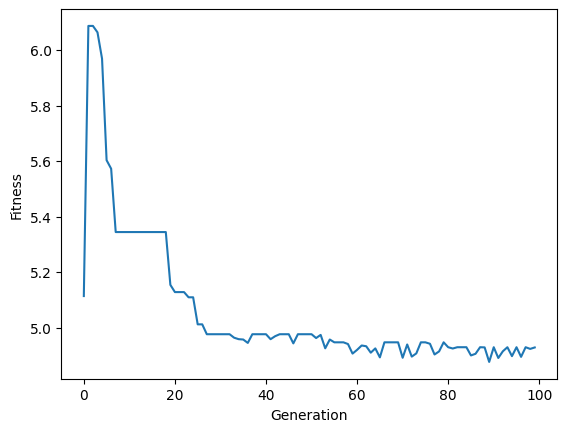

Best solutions for each generation:
Generation 0 : [3.7200e-04 2.6500e-04 2.3774e+04] Fitness: 5.1137047
Generation 1 : [3.7300e-04 2.5500e-04 2.4644e+04] Fitness: 6.0868826
Generation 2 : [8.510e-04 4.800e-05 8.835e+04] Fitness: 6.0868826
Generation 3 : [3.4600e-04 2.1600e-04 2.4835e+04] Fitness: 6.0637193
Generation 4 : [7.9000e-04 2.6900e-04 2.3449e+04] Fitness: 5.968965
Generation 5 : [7.9000e-04 2.6900e-04 2.3449e+04] Fitness: 5.6031346
Generation 6 : [3.4600e-04 2.1600e-04 2.4835e+04] Fitness: 5.572436
Generation 7 : [8.510e-04 4.800e-05 8.835e+04] Fitness: 5.3442774
Generation 8 : [8.510e-04 4.800e-05 8.835e+04] Fitness: 5.3442774
Generation 9 : [8.510e-04 4.800e-05 8.835e+04] Fitness: 5.3442774
Generation 10 : [8.510e-04 4.800e-05 8.835e+04] Fitness: 5.3442774
Generation 11 : [8.510e-04 4.800e-05 8.835e+04] Fitness: 5.3442774
Generation 12 : [8.510e-04 4.800e-05 8.835e+04] Fitness: 5.3442774
Generation 13 : [8.510e-04 4.800e-05 8.835e+04] Fitness: 5.3442774
Generation 14 : [8.5

In [2]:
import numpy as np
import ga
import pickle
import tensorflow as tf

# Load the machine learning model and scaler
model = tf.keras.models.load_model(r'C:\Users\krish\ai-power-converter\machine-learning\model_5_256.h5')


# Define constraint values
Vol_lim = 7e-6
Delta_Vo_percent_lim = 1
Delta_IL_percent_lim = 10

# Genetic algorithm parameters
sol_per_pop = 12#8
num_parents_mating = 8#4
pop_size = (sol_per_pop, 3)  # We have 3 variables: fs, L, C

# Generate initial population
L_range = (30e-6, 2000e-6)  # Range for L
C_range = (30e-6, 200e-6)   # Range for C
fsw_range = (20e3, 200e3)    # Range for fsw
num_values = sol_per_pop

# Define custom scaling ranges for each input feature
L_min, L_max = 30e-6, 2000e-6
C_min, C_max = 20e-6, 1000e-6
fsw_min, fsw_max = 20e3, 200e3

# Define mutation ranges for each parameter
mutation_ranges = [(0, 100e-6), (0, 100e-6), (0, 1000)]

# # Create arrays of discrete L, C, and fsw values within the specified ranges
L_values = np.linspace(L_range[0], L_range[1], num=num_values)
C_values = np.linspace(C_range[0], C_range[1], num=num_values)

# Round the values to the desired number of decimal places
L_values = np.around(L_values, decimals=6)
C_values = np.around(C_values, decimals=6)

fsw_values = np.linspace(fsw_range[0], fsw_range[1], num=num_values, dtype=int)

initial_population = np.column_stack((L_values, C_values, fsw_values))

# # Generate initial population
# num_values = sol_per_pop

# initial_population = []

# for _ in range(num_values):
#     # Generate random values within the specified ranges
#     new_L = np.random.uniform(L_range[0], L_range[1])
#     new_C = np.random.uniform(C_range[0], C_range[1])
#     new_fsw = np.random.randint(fsw_range[0], fsw_range[1] + 1)
    
#     # Append the generated values to the initial population
#     initial_population.append([new_L, new_C, new_fsw])

# initial_population = np.array(initial_population)


# Define the fitness function
def calculate_fitness(individual):
    # Decode the individual to get fs, L, and C values
    
    L = individual[0]
    C = individual[1]
    fs = individual[2]
    # Prepare input values for prediction
    input_values = np.array([L, C, fs])
    # Apply Min-Max normalization separately for each input feature
    input_values_scaled = np.zeros_like(input_values, dtype=float)  # Initialize scaled data array

    # Scale L
    input_values_scaled[0] = (input_values[0] - L_min) / (L_max - L_min)

    # Scale C
    input_values_scaled[1] = (input_values[1] - C_min) / (C_max - C_min)

    # Scale fsw
    input_values_scaled[2] = (input_values[2] - fsw_min) / (fsw_max - fsw_min)
    # Make predictions using the model

    # Reshape the input data to match the expected shape of the model
    input_values_reshaped = input_values_scaled.reshape((1, -1))

    prediction = model.predict(input_values_reshaped, verbose=0)
    
    # Extract predictions from the model output
    P_l_s1 = prediction[0][2]
    P_l_s2 = prediction[0][3]
    P_l_C = prediction[0][4]
    P_l_L_Cu = prediction[0][5]
    
    # Calculate the objective function value based on the given equation
    objective_value = P_l_s1 + P_l_s2 + P_l_L_Cu + P_l_C
    
    return objective_value


# Define the constraints function
def check_constraints(individual):
    L = individual[0]
    C = individual[1]
    fs = individual[2]
    
    # Define the constraint values
    # Vol_L =  # Define Vol_L based on your problem-specific requirements
    # Vol_C =  # Define Vol_C based on your problem-specific requirements
    # Prepare input values for prediction
    input_values = np.array([L, C, fs])
    # Apply Min-Max normalization separately for each input feature
    input_values_scaled = np.zeros_like(input_values, dtype=float)  # Initialize scaled data array

    # Scale L
    input_values_scaled[0] = (input_values[0] - L_min) / (L_max - L_min)

    # Scale C
    input_values_scaled[1] = (input_values[1] - C_min) / (C_max - C_min)

    # Scale fsw
    input_values_scaled[2] = (input_values[2] - fsw_min) / (fsw_max - fsw_min)
    # Make predictions using the model

    # Reshape the input data to match the expected shape of the model
    input_values_reshaped = input_values_scaled.reshape((1, -1))

    prediction = model.predict(input_values_reshaped, verbose = 0)
    # Extract predictions from the model output
    Delta_IL_percent = prediction[0][0]
    Delta_Vo_percent = prediction[0][1]

    # Check if constraints are satisfied
    # constraint1 = Vol_L + Vol_C <= Vol_lim
    constraint2 = Delta_Vo_percent <= Delta_Vo_percent_lim
    constraint3 = Delta_IL_percent <= Delta_IL_percent_lim
    
    # return constraint1 and constraint2 and constraint3
    return constraint2 and constraint3  


# Genetic Algorithm optimization
best_outputs = []
best_solutions = []  # Store the best solution for each generation
best_fitnesses = []  # Store the best fitness for each generation
num_generations = 100
new_population = initial_population

for generation in range(num_generations):
    print("Generation : ", generation)
    
    # Measuring the fitness of each chromosome in the population.
    fitness_values = []
    delta_IL_percent_values = []
    delta_Vo_percent_values = []
    for individual in new_population:
        fitness_value = calculate_fitness(individual)
        fitness_values.append(fitness_value)

    fitness = np.array(fitness_values)

    
    print("Fitness")
    print(fitness)

    best_outputs.append(np.min(fitness))
    print("Best result : ", np.min(fitness))

    # Find the index of the best solution in this generation
    best_solution_idx = np.argmin(fitness)
    best_solution = new_population[best_solution_idx]
    best_solutions.append(best_solution)
    best_fitness = fitness[best_solution_idx]
    best_fitnesses.append(best_fitness)
    print("Best solution : ", best_solution)
    print("Best fitness : ", best_fitness)
    
    # Check and enforce constraints
    for i in range(sol_per_pop):
        if not check_constraints(new_population[i]):
            # Regenerate individual until it satisfies the constraints
            while not check_constraints(new_population[i]):
                # Generate all possible values within the specified range with the desired increment
                L_values_all = np.arange(L_range[0], L_range[1] + 1e-6, 1e-6)
                C_values_all = np.arange(C_range[0], C_range[1] + 1e-6, 1e-6)
                # Generate new random values for fsw, L, and C
                new_L = np.random.choice(L_values_all, 1, replace=False)
                new_C = np.random.choice(C_values_all, 1, replace=False)
                new_fsw = np.random.randint(fsw_range[0], fsw_range[1] + 1, size=1)

                new_population[i] = [new_L[0], new_C[0], new_fsw[0]]

                print(new_population[i])



    # Selecting the best parents in the population for mating.
    parents = ga.select_mating_pool(new_population, fitness, num_parents_mating)
    print("Parents")
    print(parents)

    # Generating next generation using crossover.
    offspring_crossover = ga.crossover(parents, offspring_size=(pop_size[0]-parents.shape[0], 3))
    print("Crossover")
    print(offspring_crossover)

    # Adding some variations to the offspring using mutation.
    # offspring_mutation = ga.mutation(offspring_crossover, 2)
    offspring_mutation = ga.mutation(offspring_crossover, mutation_ranges, 1)
    print("Mutation")
    print(offspring_mutation)

    # Creating the new population based on the parents and offspring.
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation

# Getting the best solution after iterating finishing all generations.
# At first, the fitness is calculated for each solution in the final generation.
fitness_values = []

for individual in new_population:
    fitness_value= calculate_fitness(individual)
    fitness_values.append(fitness_value)

fitness = np.array(fitness_values)


# Then return the index of that solution corresponding to the best fitness.
best_match_idx = np.where(fitness == np.min(fitness))

print("Best solution : ", new_population[best_match_idx, :])
print("Best solution fitness : ", fitness[best_match_idx])

import matplotlib.pyplot as plt
plt.plot(best_outputs)
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.show()

# Print the best solutions for each generation
print("Best solutions for each generation:")
for i, (solution, fitness) in enumerate(zip(best_solutions, best_fitnesses)):
    print("Generation", i, ":", solution, "Fitness:", fitness)


Best fitness :  5.1137047

In [24]:
import numpy as np

def mutation(offspring_crossover, mutation_ranges, num_mutations=1):
    mutated_offspring = np.copy(offspring_crossover)
    num_genes = mutated_offspring.shape[1]
    
    # Mutation changes a number of genes as defined by the num_mutations argument.
    # The changes are random.
    for idx in range(mutated_offspring.shape[0]):  # Iterate over each individual in the population
        for _ in range(num_mutations):  # Perform the specified number of mutations for each individual
            for gene_idx in range(num_genes):  # Iterate over each gene in the individual
                # Determine whether to add or subtract the mutation value randomly
                add_or_subtract = np.random.choice([-1, 1])
                
                # Obtain the mutation range for the current gene
                mutation_range = mutation_ranges[gene_idx]
                
                if gene_idx == len(mutation_ranges) - 1:  # Check if the gene is for fsw
                    # For fsw, directly generate a random float within the specified range
                    mutation_value = add_or_subtract * np.random.uniform(mutation_range[0], mutation_range[1])
                else:
                    # For L and C, scale the mutation range to match the integer range
                    upper_bound = int(mutation_range[1] * 1e6)  # Scale to match the integer range
                    mutation_value = add_or_subtract * np.random.randint(1, upper_bound + 1)
                    mutation_value /= 1e6  # Scale back to the original range if necessary
                
                # Apply mutation to the gene
                mutated_offspring[idx, gene_idx] += mutation_value
                
                # # Ensure the mutated value remains within the specified range
                # mutated_offspring[idx, gene_idx] = np.clip(mutated_offspring[idx, gene_idx], mutation_range[0], mutation_range[1])
    
    return mutated_offspring

# Define the mutation range for each gene (L, C, and fsw)
mutation_ranges = [(0, 100e-6), (0, 100e-6), (0, 1000)]

# Example offspring crossover matrix
offspring_crossover = np.array([[0.0001, 0.0001, 20000],
                                [0.0001, 0.0001, 20000],
                                [0.0001, 0.0001, 20000],
                                [0.0001, 0.0001, 20000]])

# Perform mutation
mutated_offspring = mutation(offspring_crossover, mutation_ranges, num_mutations=2)

# Print the mutated offspring
print("Mutation")
print(mutated_offspring)


Mutation
[[ 2.41000000e-04  1.14000000e-04  1.90367166e+04]
 [-2.00000000e-05  8.10000000e-05  1.93601529e+04]
 [ 1.87000000e-04  9.40000000e-05  1.99253123e+04]
 [ 1.40000000e-04  1.72000000e-04  2.04172431e+04]]


In [14]:
# Generate all possible values within the specified range with the desired increment
L_values_all = np.arange(L_range[0], L_range[1] + 1e-6, 1e-6)
C_values_all = np.arange(C_range[0], C_range[1] + 1e-6, 1e-6)

# Randomly choose values from the generated arrays
L_values = np.random.choice(L_values_all, 10, replace=False)
C_values = np.random.choice(C_values_all, 10, replace=False)

new_fsw = np.random.randint(fsw_range[0], fsw_range[1] + 1, size=1)


print(L_values)
print(C_values)
print(new_fsw)

[0.000527 0.000794 0.001283 0.001838 0.00047  0.000627 0.001991 0.00084
 0.000313 0.000827]
[0.000733 0.000153 0.000423 0.000594 0.00063  0.000778 0.000961 0.000709
 0.00014  0.000422]
[110611]


In [6]:
import numpy as np

L_range = (30e-6, 2000e-6)  # Range for L
C_range = (30e-6, 200e-6)   # Range for C
# L = [30e-6, 2000e-6]  
# C = [20e-6, 1000e-6]
fsw_range = (20e3, 200e3)    # Range for fsw
num_values = 30           # Number of values for each parameter

# Borders for R_L
border_values = [
    (144e-6, 0.079576),
    (509e-6, 0.179228),
    (1003e-6, 0.253239),
    (2519e-6, 0.443394)
]

# Constants for ESL calculation
K_esl = 4.389e-11  # Adjust as needed
tan_delta = 0.14

# # Create arrays of discrete L, C, and fsw values within the specified ranges
L_values = np.linspace(L_range[0], L_range[1], num=num_values)
C_values = np.linspace(C_range[0], C_range[1], num=num_values)

# Round the values to the desired number of decimal places
L_values = np.around(L_values, decimals=6)
C_values = np.around(C_values, decimals=6)

fsw_values = np.linspace(fsw_range[0], fsw_range[1], num=num_values, dtype=int)


print("L:",L_values)
print("C:",C_values)
print("Fsw:", fsw_values)

L: [3.000e-05 9.800e-05 1.660e-04 2.340e-04 3.020e-04 3.700e-04 4.380e-04
 5.060e-04 5.730e-04 6.410e-04 7.090e-04 7.770e-04 8.450e-04 9.130e-04
 9.810e-04 1.049e-03 1.117e-03 1.185e-03 1.253e-03 1.321e-03 1.389e-03
 1.457e-03 1.524e-03 1.592e-03 1.660e-03 1.728e-03 1.796e-03 1.864e-03
 1.932e-03 2.000e-03]
C: [3.00e-05 3.60e-05 4.20e-05 4.80e-05 5.30e-05 5.90e-05 6.50e-05 7.10e-05
 7.70e-05 8.30e-05 8.90e-05 9.40e-05 1.00e-04 1.06e-04 1.12e-04 1.18e-04
 1.24e-04 1.30e-04 1.36e-04 1.41e-04 1.47e-04 1.53e-04 1.59e-04 1.65e-04
 1.71e-04 1.77e-04 1.82e-04 1.88e-04 1.94e-04 2.00e-04]
Fsw: [ 20000  26206  32413  38620  44827  51034  57241  63448  69655  75862
  82068  88275  94482 100689 106896 113103 119310 125517 131724 137931
 144137 150344 156551 162758 168965 175172 181379 187586 193793 200000]


# try looking for Volume

In [2]:
import csv

def search_volume(capacitance, csv_file):
    with open(csv_file, mode='r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            if float(row['Capacitance']) == capacitance:
                return float(row['Total Volume'])
    return None

# Example usage:
csv_file = r'E:\ai-power-converter\dataset\lookup_table_capacitor.csv'  # Replace 'your_csv_file.csv' with the path to your CSV file
capacitance_to_search = 100e-6  # Example capacitance value to search for

total_volume = search_volume(capacitance_to_search, csv_file)
if total_volume is not None:
    print(f"Total volume for capacitance {capacitance_to_search}: {total_volume}")
else:
    print(f"No matching entry found for capacitance {capacitance_to_search}")


Total volume for capacitance 0.0001: 0.000108856


In [3]:
import csv
import numpy as np

def search_volume(capacitance, csv_file):
    with open(csv_file, mode='r') as file:
        reader = csv.DictReader(file)
        capacitance_values = []
        volume_values = []
        for row in reader:
            capacitance_values.append(float(row['Capacitance']))
            volume_values.append(float(row['Total Volume']))
        
        # Find the index of the nearest capacitance value
        nearest_idx = np.abs(np.array(capacitance_values) - capacitance).argmin()
        nearest_capacitance = capacitance_values[nearest_idx]
        nearest_volume = volume_values[nearest_idx]
        
        return nearest_capacitance, nearest_volume

# Example usage:
csv_file = r'E:\ai-power-converter\dataset\lookup_table_capacitor.csv'  # Replace 'your_csv_file.csv' with the path to your CSV file
capacitance_to_search = 100e-6  # Example capacitance value to search for

nearest_capacitance, total_volume = search_volume(capacitance_to_search, csv_file)
print(f"Nearest capacitance found: {nearest_capacitance}")
print(f"Total volume for capacitance {nearest_capacitance}: {total_volume}")


Nearest capacitance found: 0.0001
Total volume for capacitance 0.0001: 0.000108856
